# Understanding the Demographics & Influence of Technica

### By Raghav Chetal and Sofia Fernandez-Poyatos

<p> Computer Science has always been a generally male-dominated career, with only 18% of all computer scientists being women and 20% of Computer Science students being women at University of Maryland. </p>

![](technica_cover.jpg)

## Our Motivation

[Technica](https://gotechnica.org) is the world's largest all-women and nonbinary hackathon, hosted annually at the University of Maryland. Since its inception in 2015, Technica has been putting a spotlight on women in the computer science workplace and empowering them to succeed. 
<br><br>
We've both been involved with Technica's organization through director and mentor positions. We are interested in understanding Technica's influence in different age groups, studies and states.
<br><br>
We received permission from the Technica organizing team to use several participant registration datasets. In this tutorial, we will focus on 2018's registration data, because it is the most completed. 

This dataset includes information such as:
<br>
* Age
* Major
* School
* Background/Ethnicity
* Gender
* State
* Institution/University
* Retention Rate

## Required Libraries¶

The following libraries/tools will be used throughout the project and are required to replicate the findings here. All of the tools below are listed with their use in this project. To install the packages without visiting the webpages, you can use $ pip3 install [library name].
<br>
* _pandas_ : a data analysis toolkit which makes storing and accessing data easier
* _numpy_ : a package for mathematical computing
* _seaborns_ : creating graphs
* _matplotlib_ : creating pie charts
* _folium_ : creating map visualizations
* _sklearn_ : making regressions and doing statistical analysis

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import sklearn
import matplotlib

matplotlib.style.use("ggplot")

data = pd.read_csv("technica_data_2018.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 21 columns):
Age                       2224 non-null int64
Birthday                  2224 non-null object
Gender Identity           2221 non-null object
Backgrounds               2220 non-null object
School Level              2217 non-null object
Graduation Year           2216 non-null object
First Hackathon?          2220 non-null object
First Technica?           2220 non-null object
Location                  2220 non-null object
Institution               1835 non-null object
Preferred Pronouns        2219 non-null object
Food Restrictions         2220 non-null object
University                227 non-null object
Major                     1830 non-null object
Unnamed: 14               0 non-null float64
State                     1850 non-null object
Country (non-USA)         35 non-null object
Tech + Research Track?    745 non-null object
Unnamed: 18               0 non-null float64
Unnamed: 

## Data Curation
Before uploading the CSV files we removed any private data (i.e. participants name, email and t-shirt size). Here we will remove any unecessary data (food restrictions, pronouns, tokens, and unnamed columns) that do not contribute to our analysis 

In [31]:
# data.drop(['Food Restrictions')
clean_data = data.drop(['Preferred Pronouns', 'Food Restrictions','Unnamed: 14','Unnamed: 18',
                        'Unnamed: 19','Unnamed: 20', 'University'], axis = 'columns')
clean_data

,Age,Birthday,Gender Identity,Backgrounds,School Level,Graduation Year,First Hackathon?,First Technica?,Location,Institution,Major,State,Country (non-USA),Tech + Research Track?
0,22,5/18/96,Female,Hispanic or Latino,College (Undergraduate),2019,True,True,Olney,University of Maryland College Park,Environmental Science and Technology,Maryland,NaN,True
1,17,5/15/01,Female,Asian / Pacific Islander,High School,2019,True,True,Ellicott City,NaN,NaN,Maryland,NaN,False
2,21,10/25/97,Female,Prefer not to answer,College (Undergraduate),2020,False,True,Gaithersburg,University of Maryland College Park,Computer Science,Maryland,NaN,False
3,20,9/22/98,Female,Asian / Pacific Islander,College (Undergraduate),2021,True,True,College Park,University of Maryland College Park,Mechanical Engineering,Maryland,NaN,True
4,20,3/12/98,Female,Asian / Pacific Islander,College (Undergraduate),2020,False,True,College Park,University of Maryland College Park,Bioengineering,Maryland,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,16,1/17/02,Female,Asian / Pacific Islander,High School,2020,False,False,"Rockville, MD",NaN,NaN,NaN,NaN,NaN
2220,16,1/1/02,Female,White/Caucasian,High School,2020,True,True,"Columbia, MD",NaN,NaN,NaN,NaN,NaN
2221,20,11/10/98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2222,23,12/29/94,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


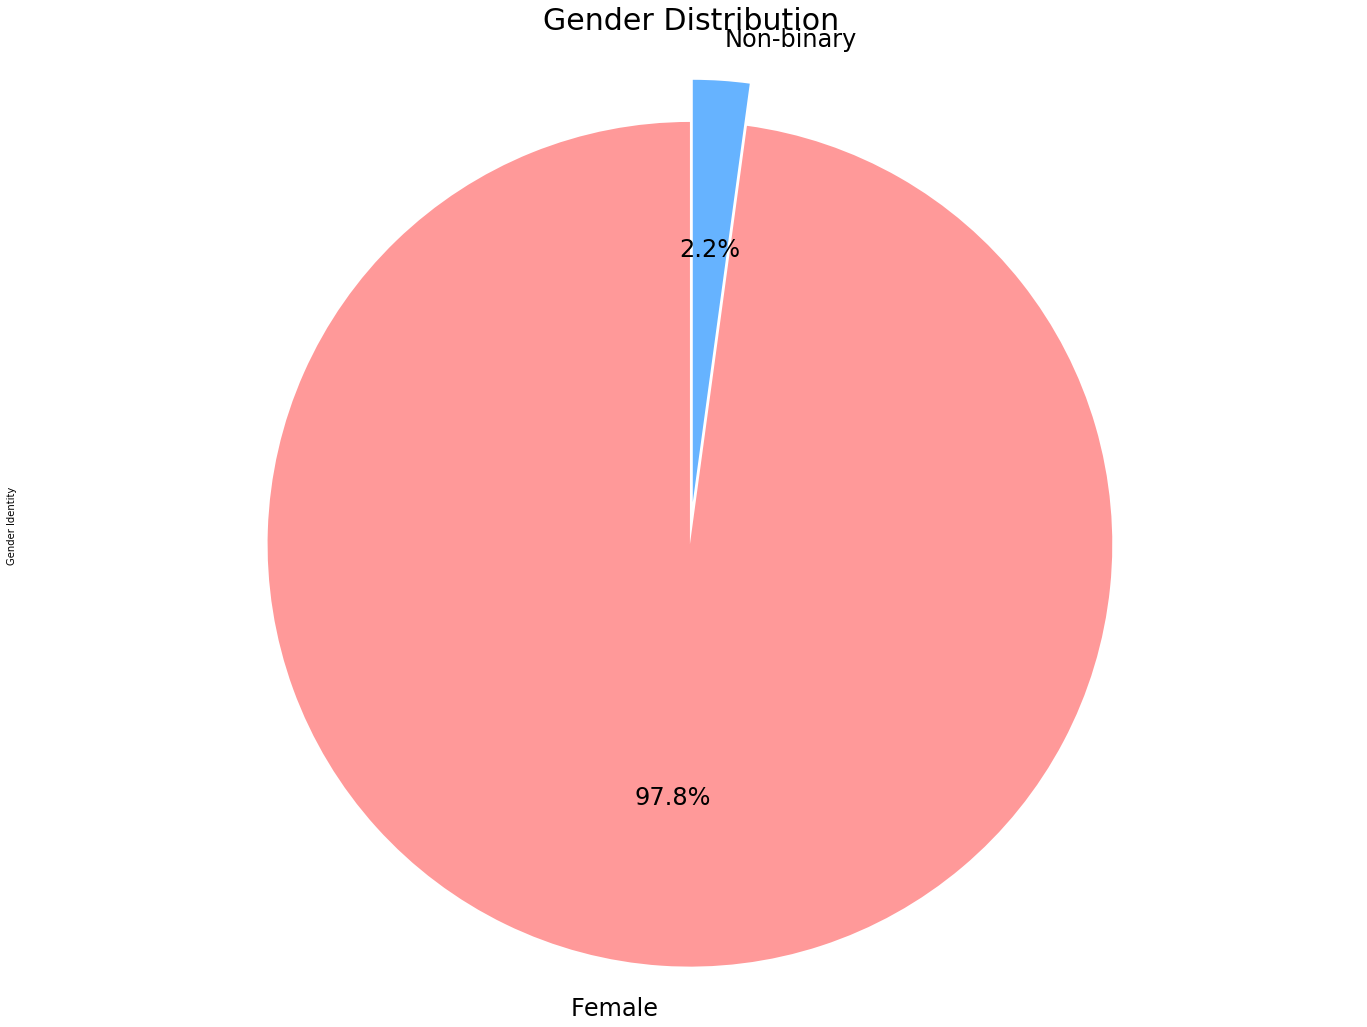

In [80]:
# Removes invalid answers, surveys were self-fill, so there is some invalid data
occurrences = data['Gender Identity'].value_counts()[0:2]

# Creates a Pie Chart of the Gender Identity data
plt.figure(figsize = (24, 18))
occurrences.plot.pie(y=occurrences.index,
           shadow=False,
           colors=colors, 
           explode=(0, 0.1),
           startangle=90,
           autopct='%1.1f%%',
        textprops={'fontsize': 24})

plt.axis('equal')
plt.title('Gender Distribution', fontsize = 30)
plt.show()

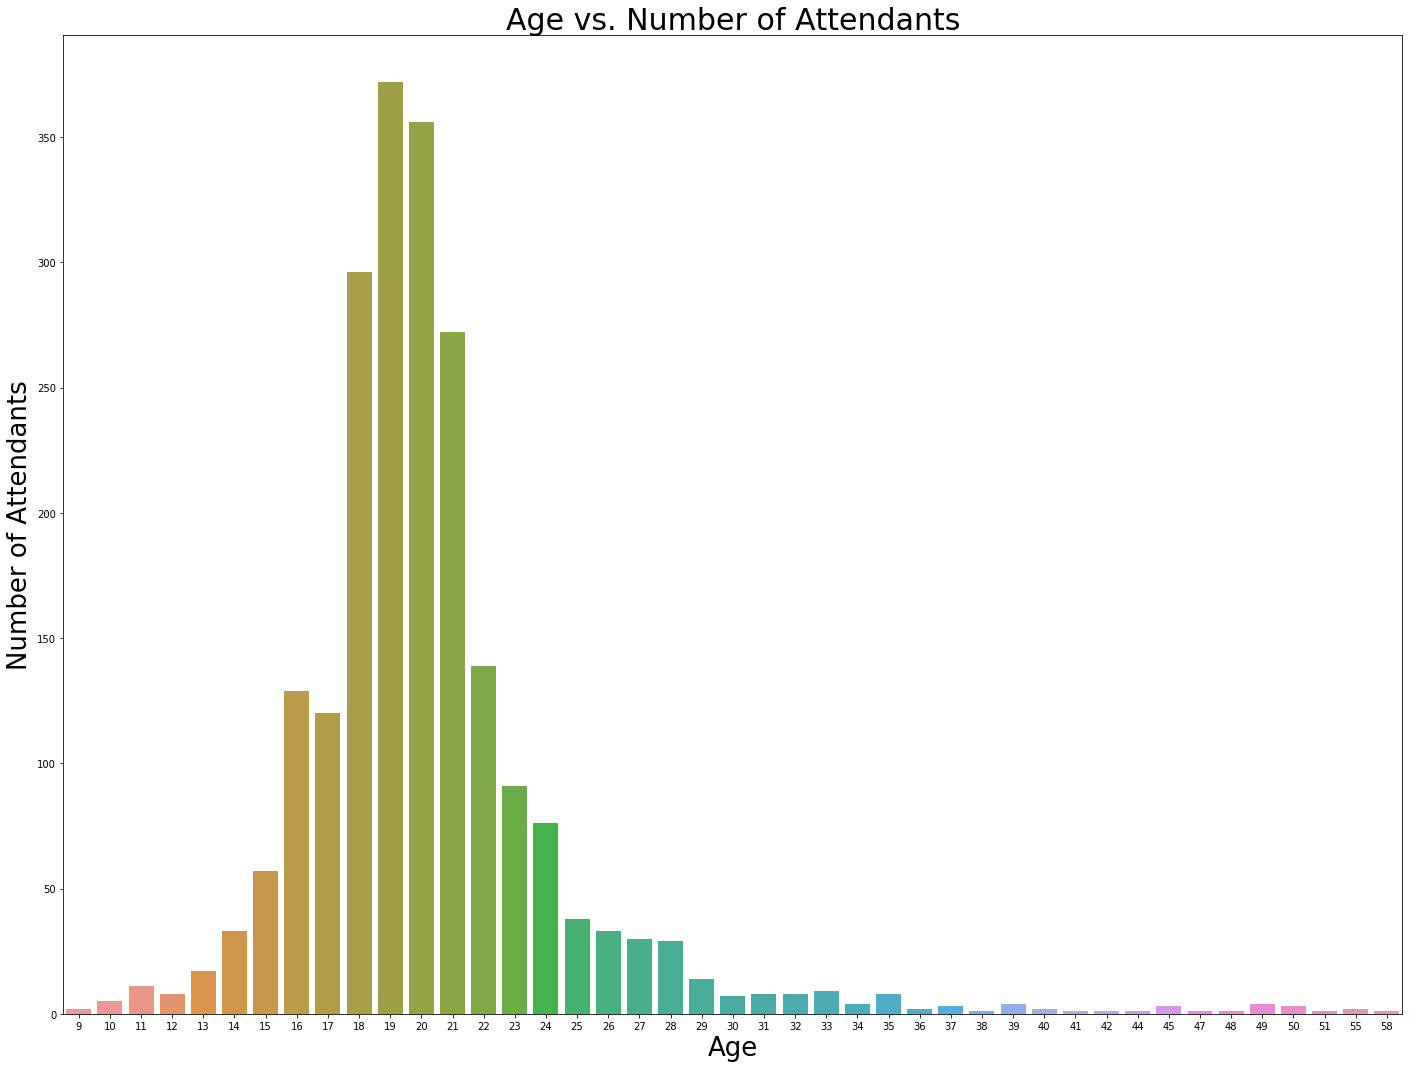

In [81]:
# Removes invalid answers, surveys were self-fill (Remove ages under 5)
age_fix = data[data['Age'] > 5]

# Plot the Barplot
plt.figure(figsize = (24, 18))
occurrences = age_fix['Age'].value_counts()
ax = sns.barplot(x=occurrences.keys(), y=occurrences.values, data=data)
plt.title('Age vs. Number of Attendants', fontsize = 30)
plt.ylabel('Number of Attendants', fontsize = 26)
plt.xlabel('Age', fontsize = 26)
plt.show()